# 분류(클래스 예측)

In [1]:
# MNIST 데이터셋 (손글씨 데이터셋) - 총 70000개, 28*28 픽셀 이미지 데이터
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [2]:
# 대부분의 사이킷런 데이터셋은 비슷한 딕셔너리 구조
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X = mnist['data']
X.shape           # 각각의 특성은 0(흰색) ~ 255(검은색) 까지의 픽셀 강도

(70000, 784)

In [4]:
y = mnist['target']
y.shape

(70000,)

In [19]:
# 샘플 하나 이미지화 확인
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [20]:
pick_digit = X[:1]
pick_digit

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
pick_digit_img = np.array(pick_digit).reshape(28, 28)
pick_digit_img

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

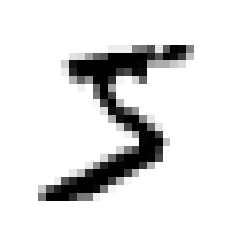

In [22]:
plt.imshow(pick_digit_img, cmap='binary')
plt.axis('off')
plt.show()

In [23]:
y[0]

5

In [24]:
import numpy as np

y = y.astype(np.uint8)

In [25]:
# 훈련 데이터 세트와 테스트 데이터 세트 분리

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [26]:
# 이진 분류 - 5 감지기 (5이면 True, 5가 아니면 False)
y_train_5 = (y_train == 5)
y_test_5 = (y_test==5)

In [27]:
# 분류하기 위한 모델을 선택하여 훈련 - 확률적 경사 하강법 분류기
# : 매우 큰 데이터셋을 효율적으로 처리하는 장점
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [28]:
# 확인
sgd_clf.predict([pick_digit][0])

array([ True])

In [30]:
# 성능 측정
# 정확도 측정 도구 : k-겹 교차 검증
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [31]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(delf, X):
        return np.zeros((len(X), 1), dtype=bool)

In [32]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.0997 , 0.0965 , 0.09995])

In [34]:
# 오차행렬
# cross_val_predict : k-겹 교차 검증을 수행하지만 평가 점수를 반환하지 않고 각 테스트 폴드에서 얻은 예측을 반환
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [36]:
# 정밀도/재현율
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [37]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [38]:
# F1 score
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

### 다중 분류

In [ ]:
'''
# 일반적으로 로지스틱 회귀, 서포트 벡터 머신 분류기 등은 이진 분류만 가능
# SGD, 랜덤 포레스트, 나이브 베이즈 등은 다중 분류 가능
# 그러나 이진 분류기를 여러 개 사용해 다중 클래스를 분류하는 기법도 많이 사용
> 기법
 OvR 전략 (one-versus-the-rest) / OvA(one-versus-all) : 이미지를 분류할 때 각 분류기의 결정 점수 중에서 가장 높은 것을 클래스로 선택
 OvO 전략 (one-versus-one) 전략 : 각 이미지가 나타낼 숫자의 조합마다 이진 분류기를 훈련
 
 - 그래서 보통 대부분의 이진 분류 알고리즘을 사용하는 다중 분류기법은 OvR을 선호
 - sklearn은 알고리즘에 따라서 자동으로 OvR, OvO를 선택해서 실행
'''

In [40]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

SVC()

In [41]:
svm_clf.predict([pick_digit][0])

array([5], dtype=uint8)

In [43]:
pick_digit_scores = svm_clf.decision_function([pick_digit][0])
pick_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [44]:
# 다중분류기가 클래스를 어떻게 인식하고 있는지
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [45]:
# 다중분류기 정확도 평가
cross_val_score(svm_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.977 , 0.9738, 0.9739])